In [ ]:
#import req libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

import os
import warnings
warnings.filterwarnings("ignore")

os.environ["OMP_NUM_THREADS"] = "1"

## Importing and Preprocessing

In [ ]:
dataset = pd.read_csv("garments_worker_productivity.csv")

In [ ]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
dataset.tail()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.9,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.9,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.9,NaN,1800,0,0.0,0,0,15.0,0.505889
1196,3/11/2015,Quarter2,finishing,Wednesday,6,0.70,2.9,NaN,720,0,0.0,0,0,6.0,0.394722


In [ ]:
dataset.shape

(1197, 15)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
dataset.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

## wip

506 missing values in wip:work in progress column.This means there are no unfinished jobs for these quarters.

In [ ]:
#Replacing missing values with zero for no pending jobs
dataset['wip'].fillna(0,inplace=True)

## Department

In [ ]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
dataset['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

In [ ]:
# Replace 'seeing' with 'sewing' in the 'department' column
dataset['department'] = dataset['department'].replace('sweing', 'sewing')

In [ ]:
dataset['department'] = dataset['department'].str.strip() # removing error in 'finishing'

In [ ]:
dataset['department'] = dataset['department'].str.strip()

In [ ]:
dataset['department'].value_counts()

sewing       691
finishing    506
Name: department, dtype: int64

## Month

In [ ]:
dataset['date'] = pd.to_datetime(dataset['date'])
dataset['month'] = dataset['date'].dt.month_name()
dataset.head()



,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,2015-01-01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725,January
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500,January
2,2015-01-01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
3,2015-01-01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570,January
4,2015-01-01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382,January


## Team

In [ ]:
dataset['team'] = dataset['team'].apply(lambda x:str(x)) # Making team number an object type

# Exploring Columns Visually

In [ ]:
## Team

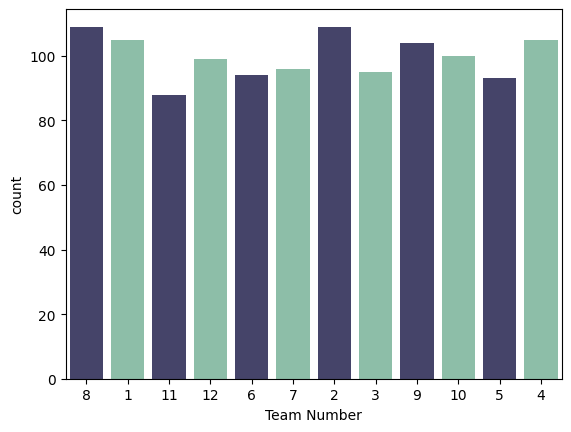

In [ ]:
ax = sns.countplot(x = 'team', data = dataset, palette=["#3f3e6fd1", "#85c6a9"])
plt.xlabel('Team Number')
plt.show()

## SMV Time Allocated Per Task

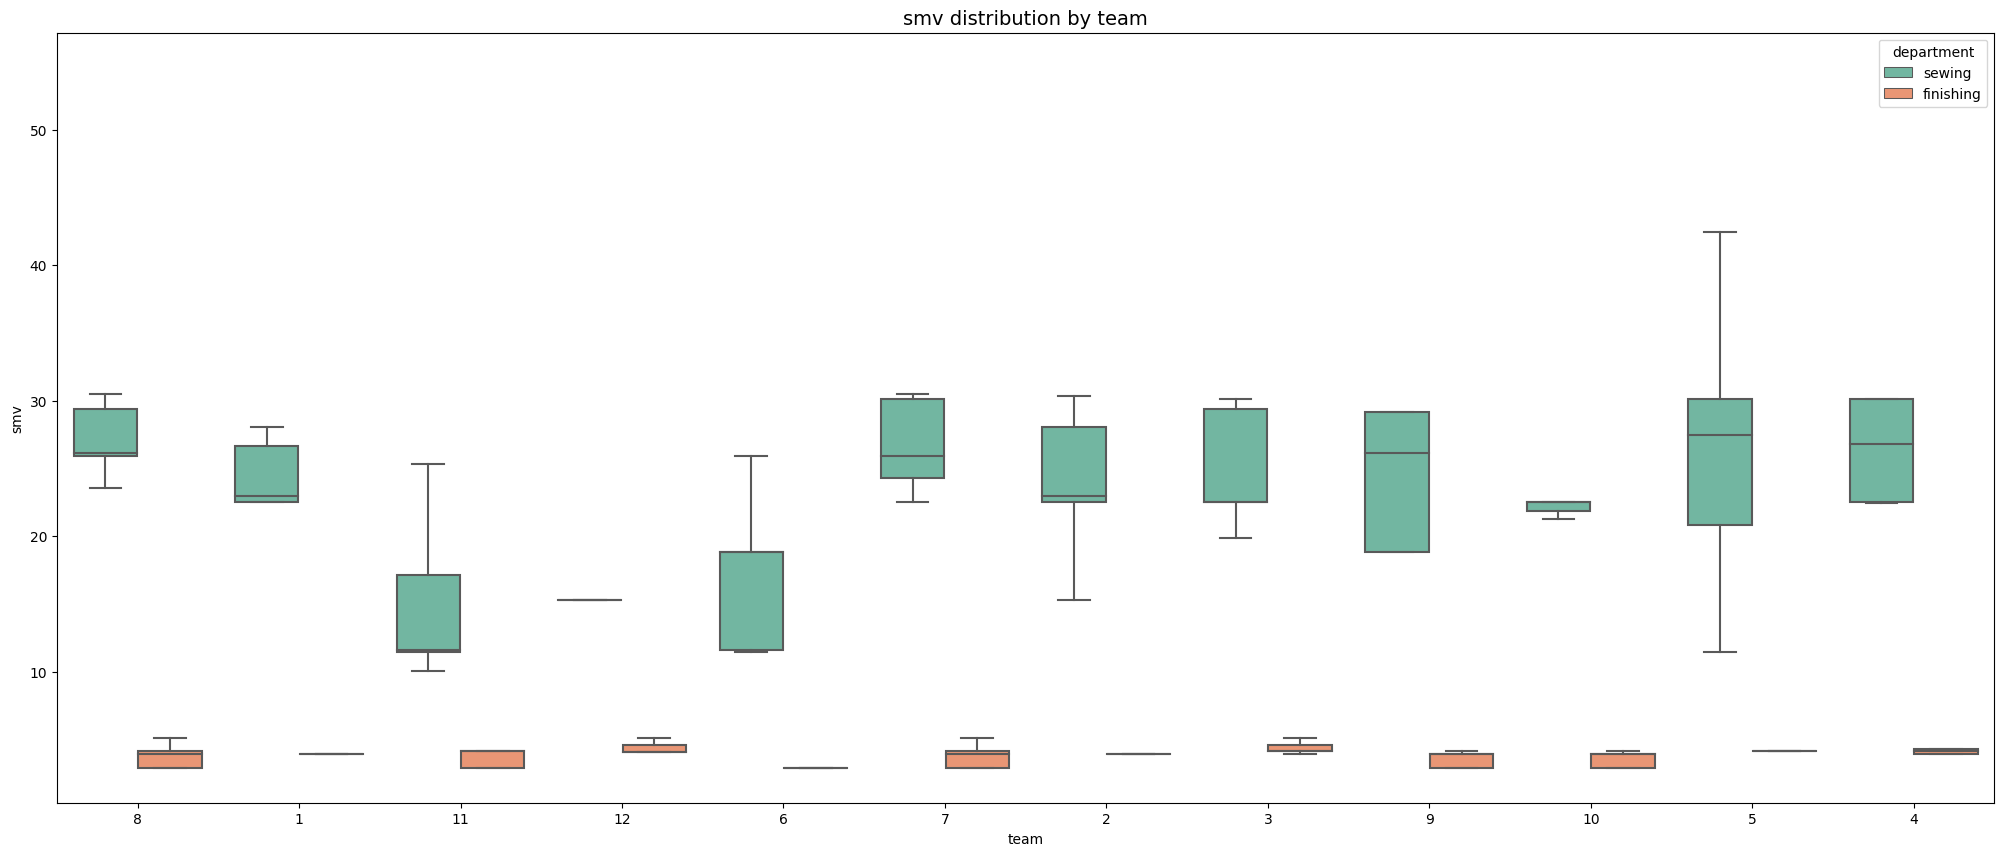

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set2"

sns.boxplot(x="team", y="smv", hue="department", data = dataset,
     palette = palette, fliersize = 0)

plt.title('smv distribution by team',fontsize= 14)
plt.show()

<Axes: xlabel='no_of_workers', ylabel='smv'>

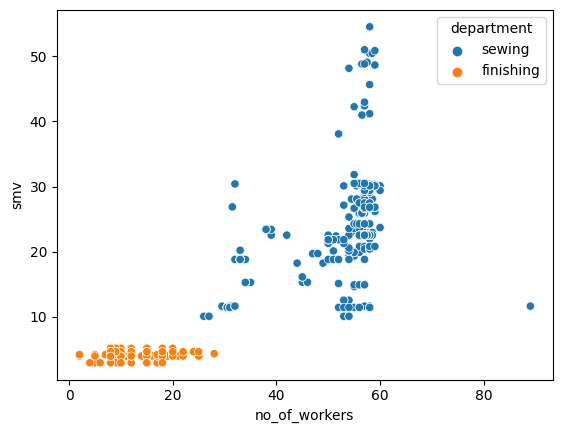

In [ ]:
sns.scatterplot(data=dataset, x="no_of_workers", y="smv", hue="department")

## WIP Work In Progress

<Axes: xlabel='department', ylabel='wip'>

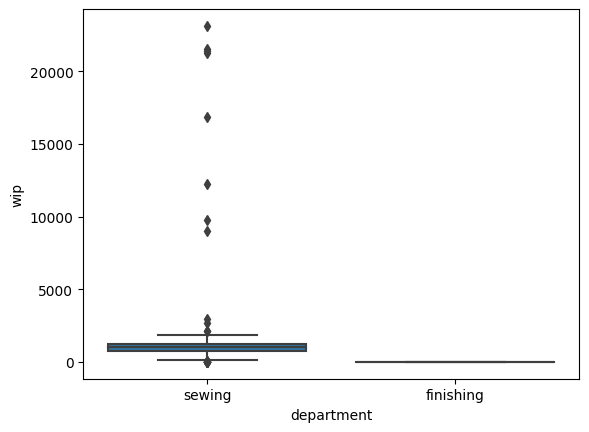

In [ ]:
sns.boxplot(x='department',y='wip',data=dataset)

All unfinished Jobs Belong to Sewing Department

## OverTime

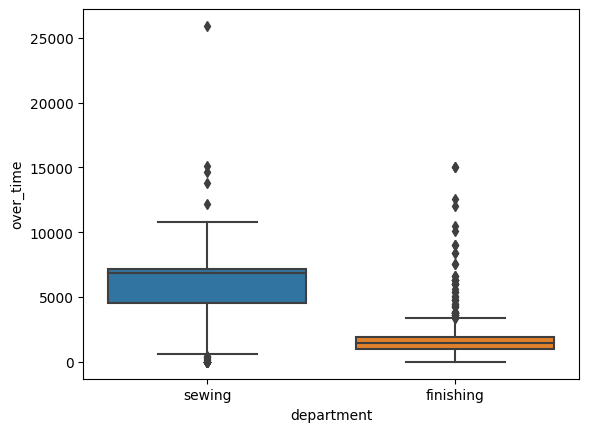

In [ ]:
sns.boxplot(x='department',y='over_time',data=dataset)
plt.show()

### Overtime Across Teams

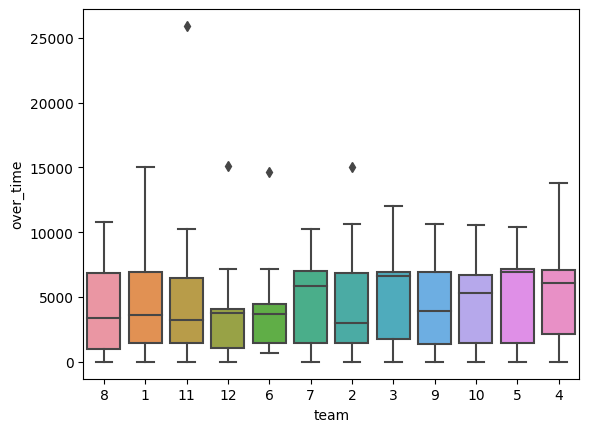

In [ ]:
sns.boxplot(x='team',y='over_time',data=dataset)
plt.show()

In [ ]:
department_overtime = dataset.groupby(['department', 'team']).median()['over_time']

for team in range(1, 12):
    for department in ['sewing', 'finishing']:
        print('Median over_time of team {} {}s: {}'.format(team, department,department_overtime [department][team]))
print('Median over_time of teams: {}'.format(dataset['over_time'].median()))

Median over_time of team 1 sewings: 6720.0
Median over_time of team 1 finishings: 1440.0
Median over_time of team 2 sewings: 3660.0
Median over_time of team 2 finishings: 1440.0
Median over_time of team 3 sewings: 4080.0
Median over_time of team 3 finishings: 1080.0
Median over_time of team 4 sewings: 6840.0
Median over_time of team 4 finishings: 1440.0
Median over_time of team 5 sewings: 6840.0
Median over_time of team 5 finishings: 1800.0
Median over_time of team 6 sewings: 7020.0
Median over_time of team 6 finishings: 1920.0
Median over_time of team 7 sewings: 7080.0
Median over_time of team 7 finishings: 1440.0
Median over_time of team 8 sewings: 3960.0
Median over_time of team 8 finishings: 960.0
Median over_time of team 9 sewings: 6960.0
Median over_time of team 9 finishings: 1440.0
Median over_time of team 10 sewings: 6840.0
Median over_time of team 10 finishings: 1440.0
Median over_time of team 11 sewings: 6930.0
Median over_time of team 11 finishings: 1140.0
Median over_time o

## No_of_workers

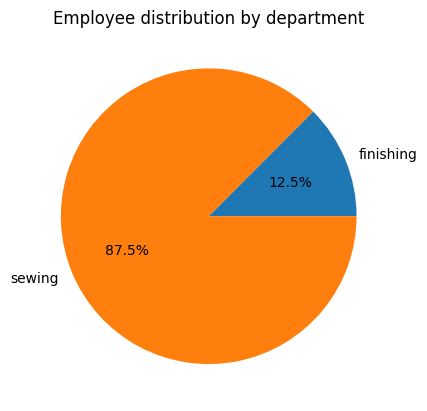

In [ ]:
data = dataset.groupby(['department']).no_of_workers.sum()
data.plot.pie(title="Employee distribution by department",autopct='%1.1f%%')
plt.ylabel(None)
plt.show()

## Actual Productivity

<Axes: xlabel='actual_productivity', ylabel='Density'>

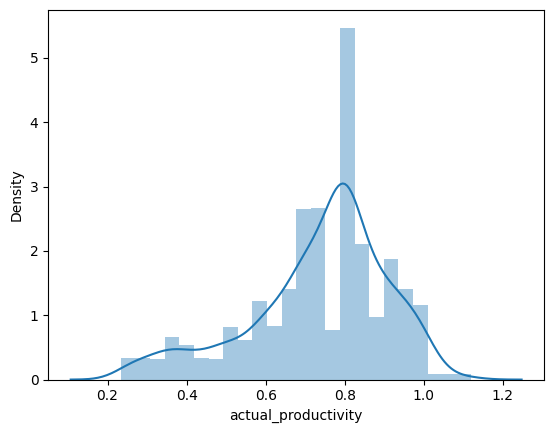

In [ ]:
sns.distplot(dataset.actual_productivity)

### Productivity across department

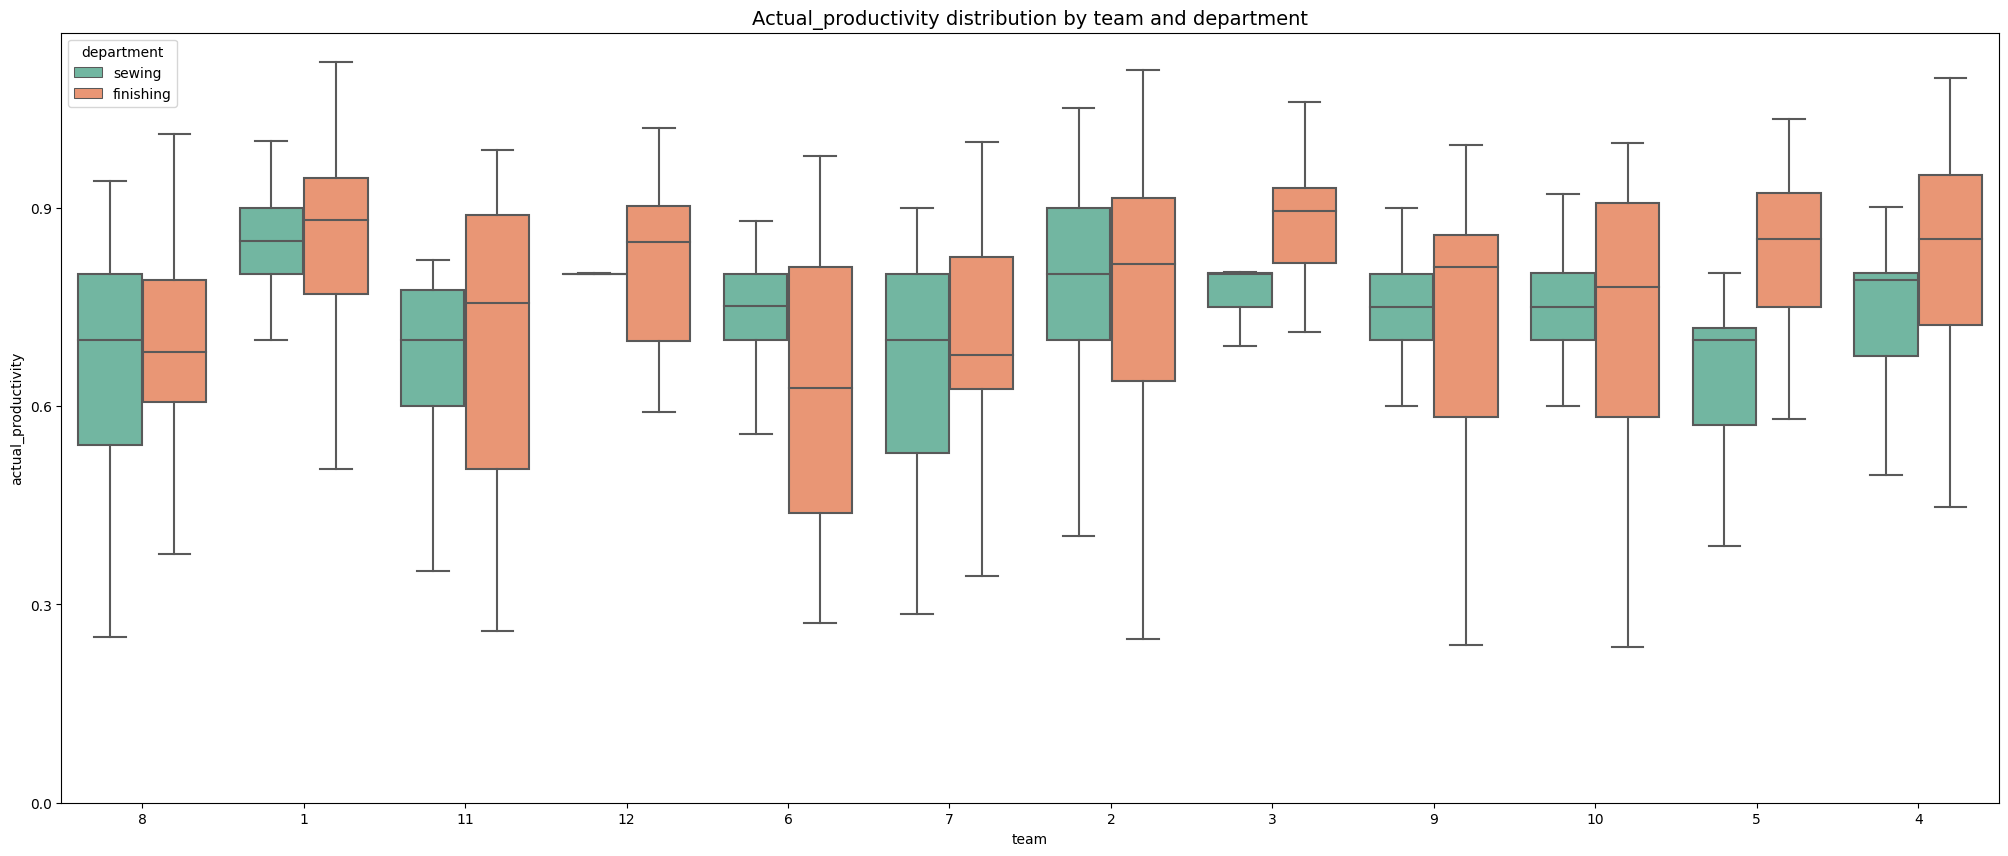

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set2"

sns.boxplot(x = 'team', y = 'actual_productivity', data = dataset,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Actual_productivity distribution by team and department',fontsize= 14)
plt.show()

## Targeted Productivity

<Axes: xlabel='targeted_productivity', ylabel='Density'>

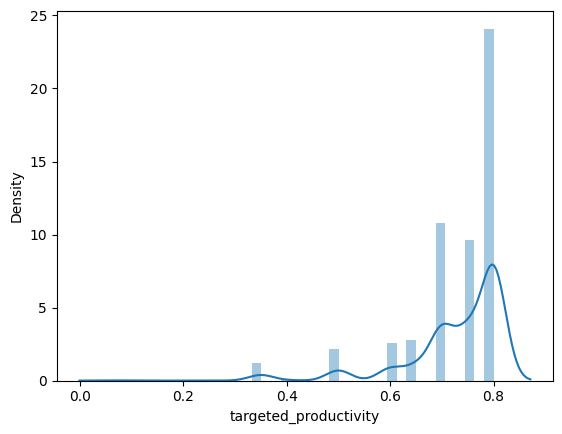

In [ ]:
sns.distplot(dataset['targeted_productivity'])

### Targeted productivity Across Departments

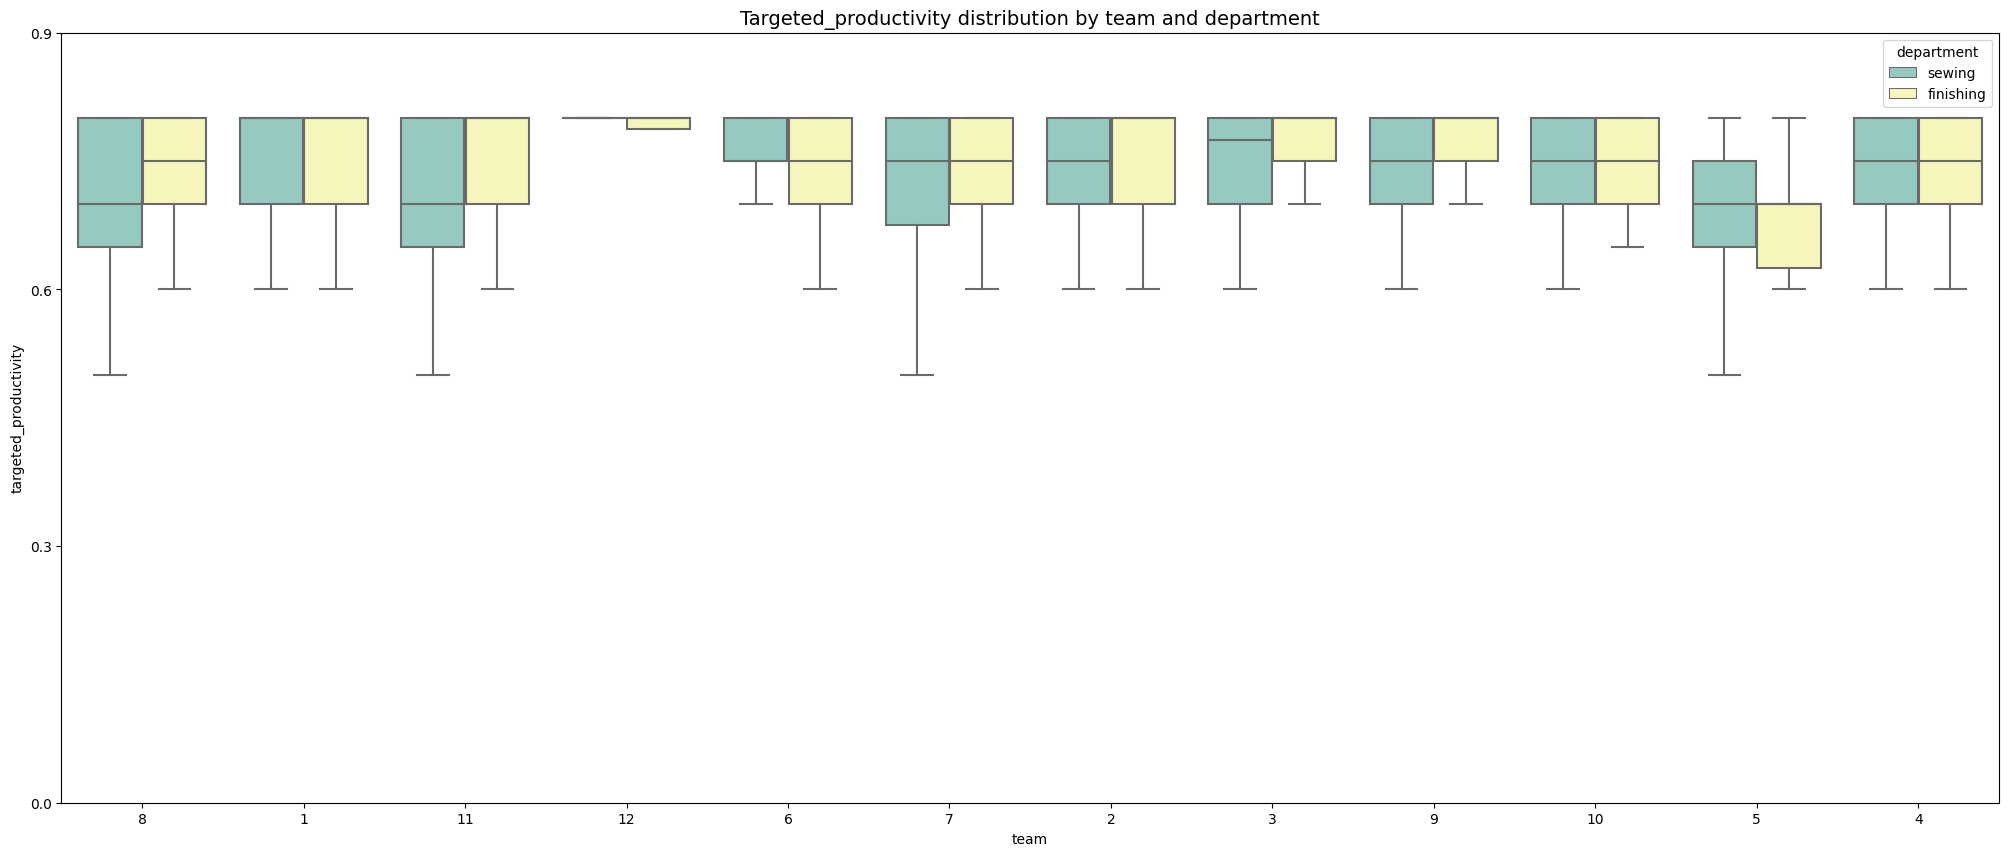

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set3"

sns.boxplot(x = 'team', y = 'targeted_productivity', data = dataset,
     palette = palette,hue='department',fliersize = 0)
plt.yticks(np.arange(0,1.2,step=0.3))
plt.title('Targeted_productivity distribution by team and department',fontsize= 14)
plt.show()

## Actual vs Targeted Productivity

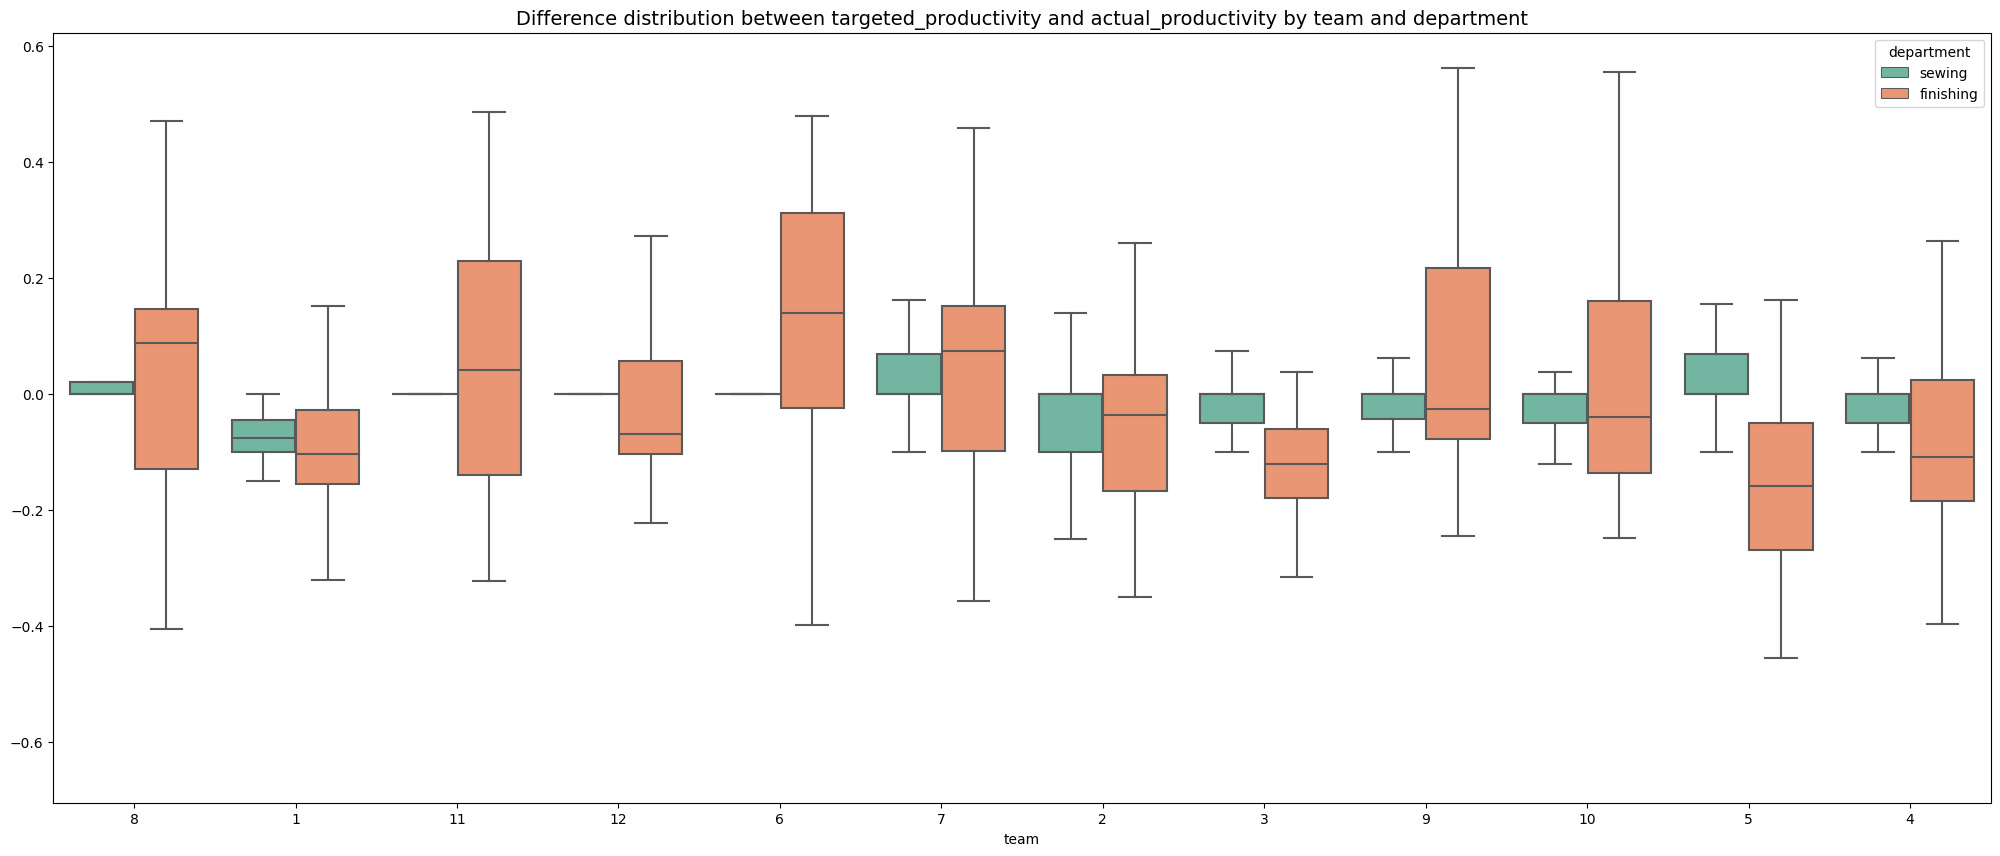

In [ ]:
plt.figure(figsize=(25, 10))
palette = "Set2"

sns.boxplot(x = 'team', y = dataset.targeted_productivity-dataset.actual_productivity, data = dataset,
     palette = palette,hue='department',fliersize = 0)

plt.title('Difference distribution between targeted_productivity and actual_productivity by team and department',fontsize= 14)
plt.show()

## Correlation Plot

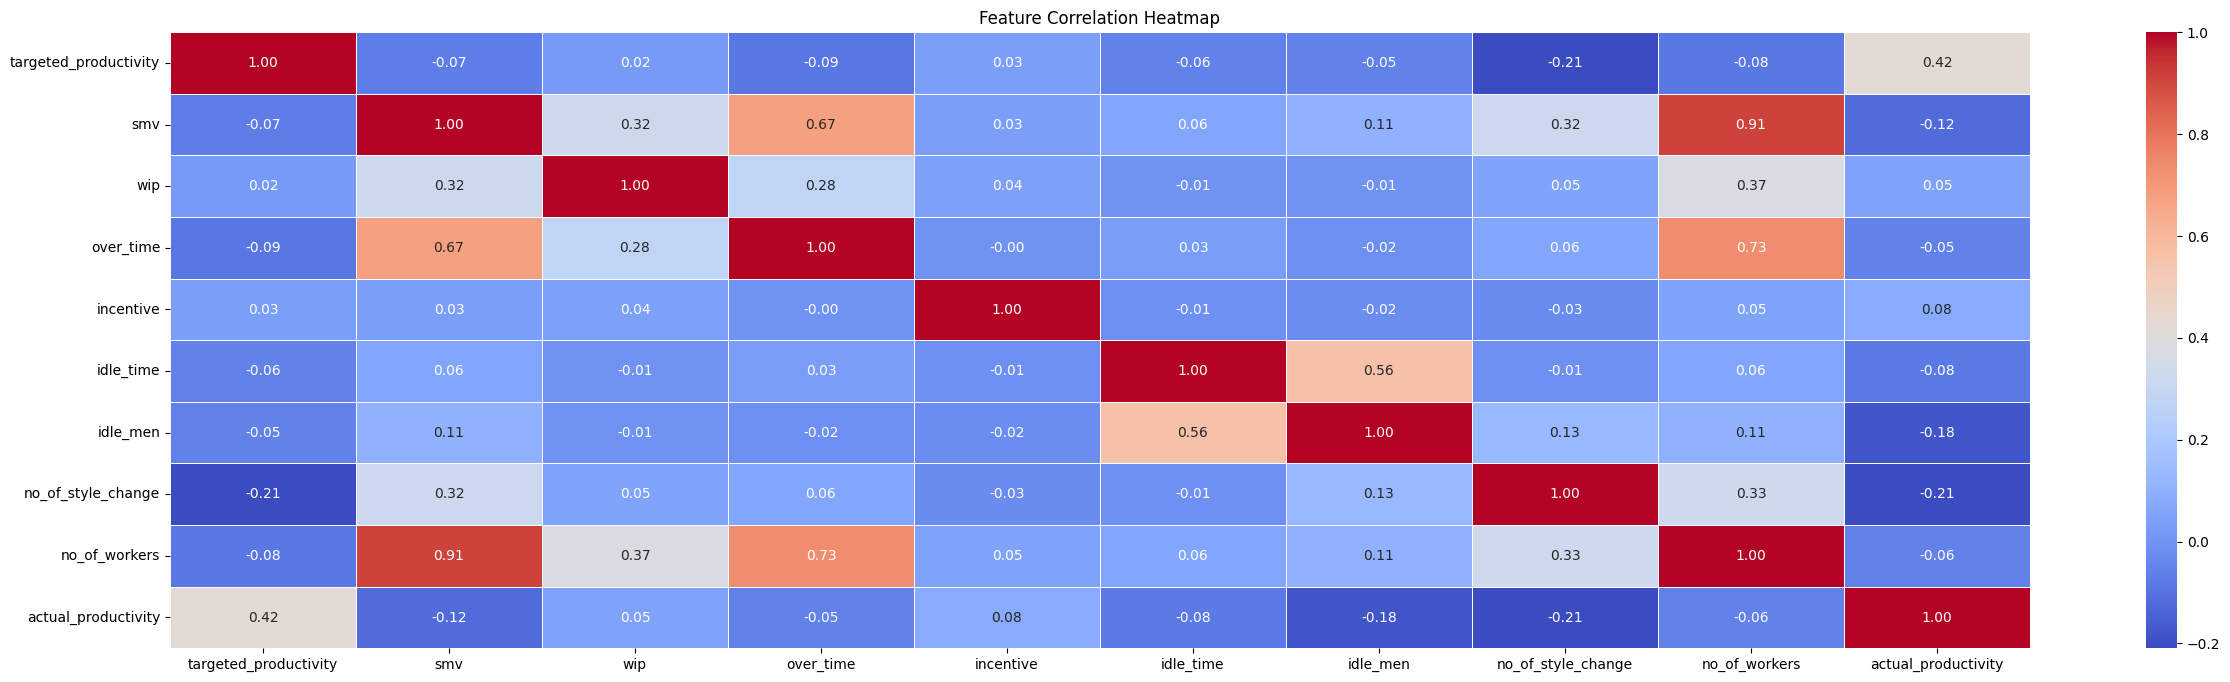

In [ ]:
correlation_matrix = dataset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(30, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

# Encoding Categorical Columns

In [ ]:
categorical_columns = [ 'quarter', 'department', 'day', 'team','month']

# Use pandas get_dummies to perform one-hot encoding for the specified columns
encoded_columns = pd.get_dummies(dataset[categorical_columns], columns=categorical_columns)

# Drop the original categorical columns
dataset.drop(categorical_columns, axis=1, inplace=True)


encoded_columns.head()

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


# Exploring Numerical Columns

In [ ]:
numerical_columns = dataset.select_dtypes(include=['number']).columns.tolist()

In [ ]:
numerical_columns

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_style_change',
 'no_of_workers',
 'actual_productivity']

In [ ]:
#Concatenate the one-hot encoded columns with the dataset
dataset = pd.concat([dataset, encoded_columns], axis=1)
dataset.head()

,date,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March
0,2015-01-01,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,0,0,1,0,0,1,0
1,2015-01-01,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,0,1,0
2,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,0,1,0
3,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,0,1,0
4,2015-01-01,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,0,1,0,0,0,0,1,0


<h2>Creating Productivity Label </h2>

In [ ]:
#Difference between Productivity and Predicted productivity will give us the productivity of different departments
dataset['diff'] = dataset.actual_productivity-dataset.targeted_productivity
dataset.head()

,date,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March,diff
0,2015-01-01,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,0,1,0,0,1,0,0.140725
1,2015-01-01,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,0,1,0,0.136500
2,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,1,0,0.000570
3,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,0,1,0,0.000570
4,2015-01-01,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,0,1,0,0,0,0,1,0,0.000382


In [ ]:
mean_diff = dataset['diff'].mean()
print("Mean of 'diff' column:", mean_diff)


Mean of 'diff' column: 0.00545868260985797


In [ ]:
#Creating new productivity column
dataset['Productivity']=np.nan
dataset.loc[dataset['diff']<mean_diff,'Productivity'] = 0
dataset.loc[(dataset['diff']>=mean_diff), 'Productivity'] = 1



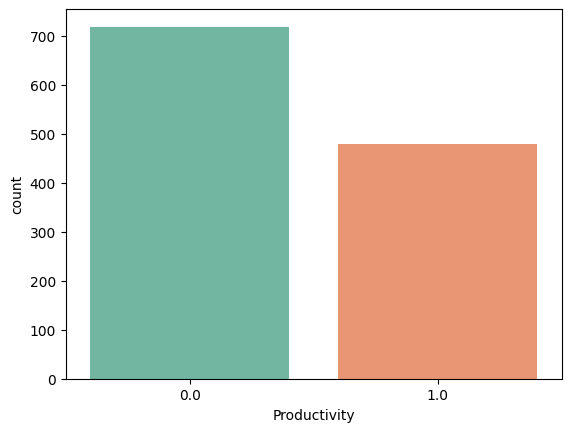

In [ ]:
ax = sns.countplot(x = 'Productivity', data = dataset, palette='Set2')
plt.xlabel('Productivity')

plt.show()

In [ ]:
# dataset['Productivity'] = np.nan

# # Set a threshold for allocating more values to 0
# threshold = 0.4  # Adjust this threshold as needed

# # Use random numbers to allocate values to 0 or 1 based on the threshold
# random_numbers = np.random.rand(len(dataset))
# dataset.loc[random_numbers < threshold, 'Productivity'] = 0
# dataset.loc[random_numbers >= threshold, 'Productivity'] = 1

In [ ]:
dataset.head()

,date,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,...,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March,diff,Productivity
0,2015-01-01,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,...,0,0,0,1,0,0,1,0,0.140725,1.0
1,2015-01-01,0.75,3.94,0.0,960,0,0.0,0,0,8.0,...,0,0,0,0,0,0,1,0,0.136500,1.0
2,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,1,0,0.000570,0.0
3,2015-01-01,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,...,0,0,0,0,0,0,1,0,0.000570,0.0
4,2015-01-01,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,...,0,1,0,0,0,0,1,0,0.000382,0.0


In [ ]:
#Drop columns not being used
dataset = dataset.drop(columns=['actual_productivity','targeted_productivity','date','diff'])

In [ ]:
dataset.head()

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March,Productivity
0,26.16,1108.0,7080,98,0.0,0,0,59.0,1,0,...,0,0,0,0,1,0,0,1,0,1.0
1,3.94,0.0,960,0,0.0,0,0,8.0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
2,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,...,0,0,0,0,0,0,0,1,0,0.0
3,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,...,0,0,0,0,0,0,0,1,0,0.0
4,25.90,1170.0,1920,50,0.0,0,0,56.0,1,0,...,0,0,1,0,0,0,0,1,0,0.0


In [ ]:
dataset.shape

(1197, 37)

# Model One KNN

In [ ]:
x = dataset.drop(columns=['Productivity'])
y = dataset['Productivity']

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
rf = RandomForestClassifier(random_state=0) # Use RandomForestClassifier asthe base model
rfecv = RFECV(rf, cv=3, step=5)
X_train = rfecv.fit_transform(X_train, y_train)
X_test = rfecv.transform(X_test)
print(f"Number of remaining features: {X_train.shape[1]}")

Number of remaining features: 36


### Balancing Training Data

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

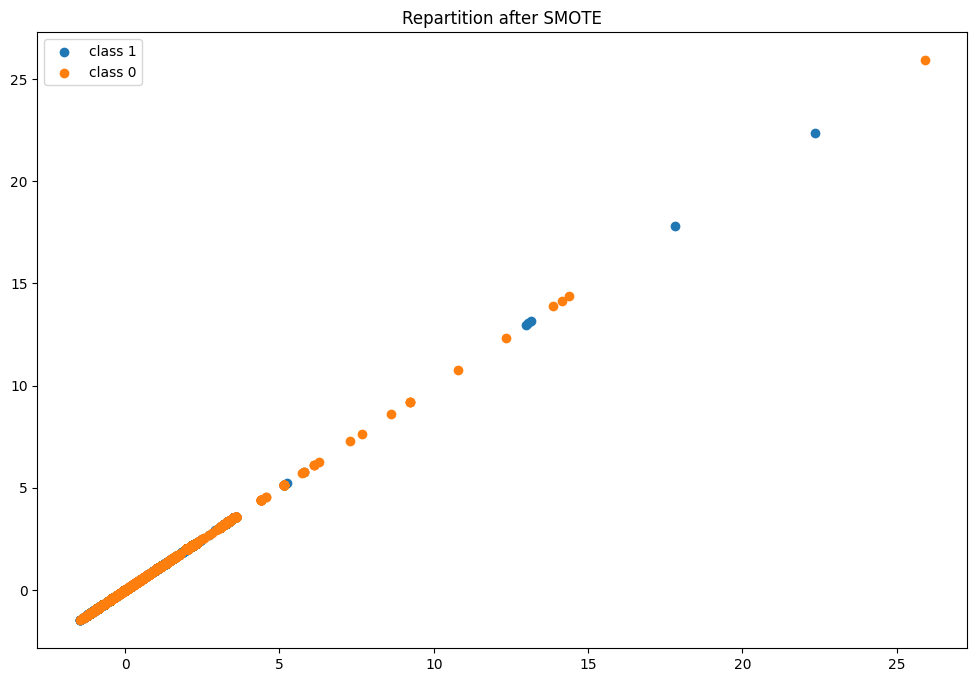

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Repartition after SMOTE')
plt.scatter(X_train[y_train==1], X_train[y_train==1], label='class 1')
plt.scatter(X_train[y_train==0], X_train[y_train==0], label='class 0')
plt.legend()
plt.grid(False)
plt.show()

<Axes: xlabel='Productivity', ylabel='count'>

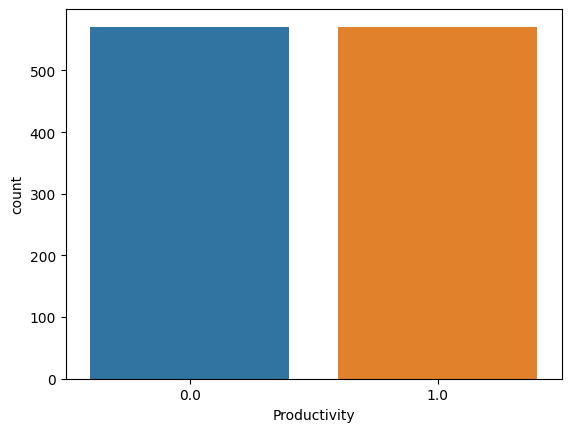

In [ ]:
sns.countplot(x = y_train)

In [ ]:
dataset.head()

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March,Productivity
0,26.16,1108.0,7080,98,0.0,0,0,59.0,1,0,...,0,0,0,0,1,0,0,1,0,1.0
1,3.94,0.0,960,0,0.0,0,0,8.0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
2,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,...,0,0,0,0,0,0,0,1,0,0.0
3,11.41,968.0,3660,50,0.0,0,0,30.5,1,0,...,0,0,0,0,0,0,0,1,0,0.0
4,25.90,1170.0,1920,50,0.0,0,0,56.0,1,0,...,0,0,1,0,0,0,0,1,0,0.0


In [ ]:
model_2 =KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
model_2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = model_2.predict(X_test)
print(y_pred)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
acc = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}\n\n")

cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm, "\n\n")
print("---------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)


Accuracy: 0.71


Confusion matrix:
[[101  46]
 [ 23  70]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.81      0.69      0.75       147
         1.0       0.60      0.75      0.67        93

    accuracy                           0.71       240
   macro avg       0.71      0.72      0.71       240
weighted avg       0.73      0.71      0.72       240



### Accuracy Score

In [ ]:
from sklearn.metrics import *
print(f"Accuracy Scire: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Scire: 71.25%


Text(0.5, 1.0, 'Confusion Matrix')

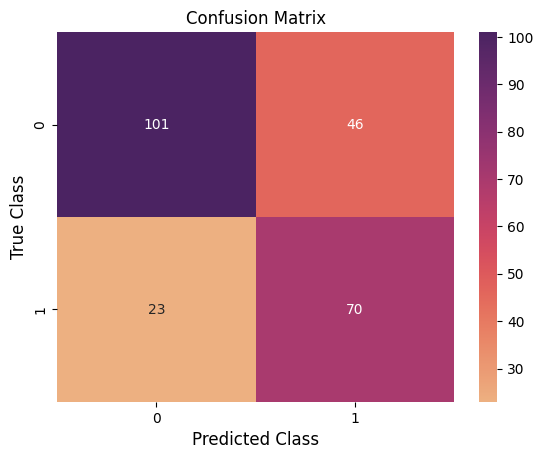

In [ ]:
ax = sns.heatmap(cm,cmap="flare",annot= True,fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

# Model Two Decision Tree

In [ ]:
model_3 = DecisionTreeClassifier(criterion = 'entropy', random_state= 0)
model_3.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#pred test sert res
y_pred = model_3.predict(X_test)
print(y_pred)

[0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:

acc=metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}\n\n")
cm= metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix")
print(cm, "\n\n")
print("---------------------------------------------------")
result=metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

Accuracy: 0.82


Confusion matrix
[[124  23]
 [ 21  72]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       147
         1.0       0.76      0.77      0.77        93

    accuracy                           0.82       240
   macro avg       0.81      0.81      0.81       240
weighted avg       0.82      0.82      0.82       240



In [ ]:
from sklearn.metrics import *
print(f"Accuracy Scire: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Scire: 81.67%


Text(0.5, 1.0, 'Confusion Matrix')

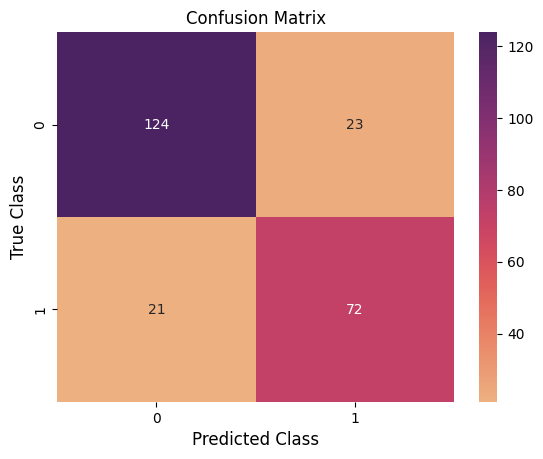

In [ ]:
ax = sns.heatmap(cm,cmap="flare",annot= True,fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

# Modifying Hyperparameters

### Function for Hyperparameters

In [ ]:
def tune_hyperparameters(model, param_grid, X_train, y_train):

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    return best_model

In [ ]:
param_grid_knn = {'n_neighbors': [7,9], 'weights': ['uniform', 'distance']}
bestknn_model = tune_hyperparameters(model_2, param_grid_knn, X_train, y_train)

In [ ]:
bestknn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, weights='distance')

In [ ]:
y_pred = bestknn_model.predict(X_test)
print(y_pred)

[0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1.
 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1.]


In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}\n\n")
cm= metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix")
print(cm, "\n\n")
print("---------------------------------------------------")
result=metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

Accuracy: 0.73


Confusion matrix
[[100  47]
 [ 17  76]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76       147
         1.0       0.62      0.82      0.70        93

    accuracy                           0.73       240
   macro avg       0.74      0.75      0.73       240
weighted avg       0.76      0.73      0.74       240



In [ ]:

print(f"Accuracy Scire: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Scire: 73.33%


Text(0.5, 1.0, 'Confusion Matrix')

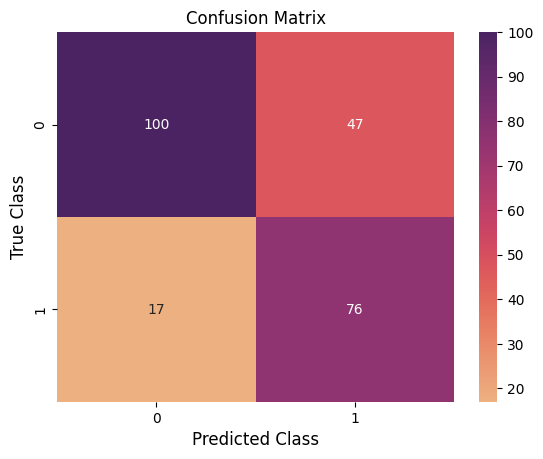

In [ ]:
ax = sns.heatmap(cm,cmap="flare",annot= True,fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

In [ ]:
param_grid_tree = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
best_tree_model = tune_hyperparameters(model_3, param_grid_tree, X_train, y_train)

In [ ]:
best_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_features='auto',
                       min_samples_leaf=2, min_samples_split=10,
                       random_state=0)

In [ ]:
#pred test sert res
y_pred = best_tree_model.predict(X_test)
print(y_pred)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
print(f"Accuracy: {acc:.2f}\n\n")
cm= metrics.confusion_matrix(y_test,y_pred)
print("Confusion matrix")
print(cm, "\n\n")
print("---------------------------------------------------")
result=metrics.classification_report(y_test,y_pred)
print("Classification Report:\n")
print(result)

Accuracy: 0.82


Confusion matrix
[[129  18]
 [ 25  68]] 


---------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       147
         1.0       0.79      0.73      0.76        93

    accuracy                           0.82       240
   macro avg       0.81      0.80      0.81       240
weighted avg       0.82      0.82      0.82       240



In [ ]:
print(f"Accuracy Scire: {accuracy_score(y_test,y_pred)*100:.2f}%")

Accuracy Scire: 82.08%


Text(0.5, 1.0, 'Confusion Matrix')

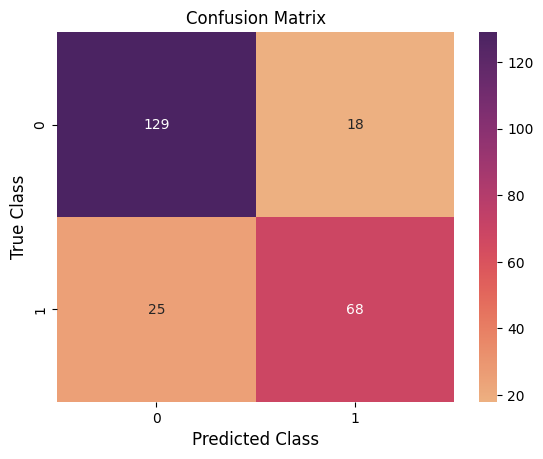

In [ ]:
ax = sns.heatmap(cm,cmap="flare",annot= True,fmt="d")

plt.xlabel("Predicted Class",fontsize=12)
plt.ylabel("True Class",fontsize=12)
plt.title("Confusion Matrix",fontsize=12)

# Create a Sample for Azure

In [ ]:
# Create a sample dataset with 50 random rows
sample_dataset = dataset.sample(n=50, random_state=42)
print(sample_dataset)
sample_dataset.head()

        smv     wip  over_time  incentive  idle_time  idle_men  \
921   22.53   708.0       5040          0        0.0         0   
321   11.41  1028.0       4380         50        0.0         0   
101    2.90     0.0       1440          0        0.0         0   
920    3.90     0.0        960          0        0.0         0   
58     2.90     0.0        960          0        0.0         0   
790   30.10   461.0          0          0        0.0         0   
948    3.94     0.0       3360          0        0.0         0   
969    3.94     0.0       3360          0        0.0         0   
410   22.52  1295.0      10170         26        0.0         0   
1079  18.79  1228.0       6240         45        0.0         0   
572   20.55  9792.0       6480         60        0.0         0   
44     3.94     0.0       6600          0        0.0         0   
49    26.16  1033.0       7080         63        0.0         0   
844    5.13     0.0       2880          0        0.0         0   
240   25.9

,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,quarter_Quarter1,quarter_Quarter2,...,team_4,team_5,team_6,team_7,team_8,team_9,month_February,month_January,month_March,Productivity
921,22.53,708.0,5040,0,0.0,0,1,42.0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
321,11.41,1028.0,4380,50,0.0,0,0,31.0,0,0,...,0,0,1,0,0,0,0,1,0,0.0
101,2.90,0.0,1440,0,0.0,0,0,8.0,1,0,...,0,0,0,0,1,0,0,1,0,0.0
920,3.90,0.0,960,0,0.0,0,0,8.0,0,0,...,0,0,0,0,0,0,1,0,0,0.0
58,2.90,0.0,960,0,0.0,0,0,8.0,1,0,...,0,0,0,1,0,0,0,1,0,0.0


In [ ]:
sample_dataset.to_csv('sample_dataset.csv', index=False)